In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
file_path = 'combined_bike_data.csv'
bike_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and the dataframe info to understand its structure
bike_data.head(), bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898518 entries, 0 to 2898517
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ride_id              object 
 1   rideable_type        object 
 2   started_at           object 
 3   ended_at             object 
 4   start_station_name   object 
 5   start_station_id     object 
 6   end_station_name     object 
 7   end_station_id       object 
 8   start_lat            float64
 9   start_lng            float64
 10  end_lat              float64
 11  end_lng              float64
 12  member_casual        object 
 13  ride_length          object 
 14  ride_length_minutes  float64
 15  day_of_week          object 
 16  hour_of_day          int64  
 17  weekend              object 
 18  season               object 
 19  distance_km          float64
 20  peak_offpeak         object 
dtypes: float64(6), int64(1), object(14)
memory usage: 464.4+ MB


(            ride_id  rideable_type           started_at             ended_at  \
 0  0D9FA920C3062031  electric_bike  2023-05-07 19:53:48  2023-05-07 19:58:32   
 1  92485E5FB5888ACD  electric_bike  2023-05-06 18:54:08  2023-05-06 19:03:35   
 2  FB144B3FC8300187  electric_bike  2023-05-21 00:40:21  2023-05-21 00:44:36   
 3  DDEB93BC2CE9AA77   classic_bike  2023-05-10 16:47:01  2023-05-10 16:59:52   
 4  C07B70172FC92F59   classic_bike  2023-05-09 18:30:34  2023-05-09 18:39:28   
 
             start_station_name start_station_id             end_station_name  \
 0  Southport Ave & Belmont Ave            13229                          NaN   
 1  Southport Ave & Belmont Ave            13229                          NaN   
 2         Halsted St & 21st St            13162                          NaN   
 3      Carpenter St & Huron St            13196      Damen Ave & Cortland St   
 4     Southport Ave & Clark St     TA1308000047  Southport Ave & Belmont Ave   
 
   end_station_id  start

rideable_type
classic_bike      21.165827
docked_bike      191.127399
electric_bike     13.415040
Name: ride_length_minutes, dtype: float64
member_casual
casual    31.580351
member    13.449741
Name: ride_length_minutes, dtype: float64


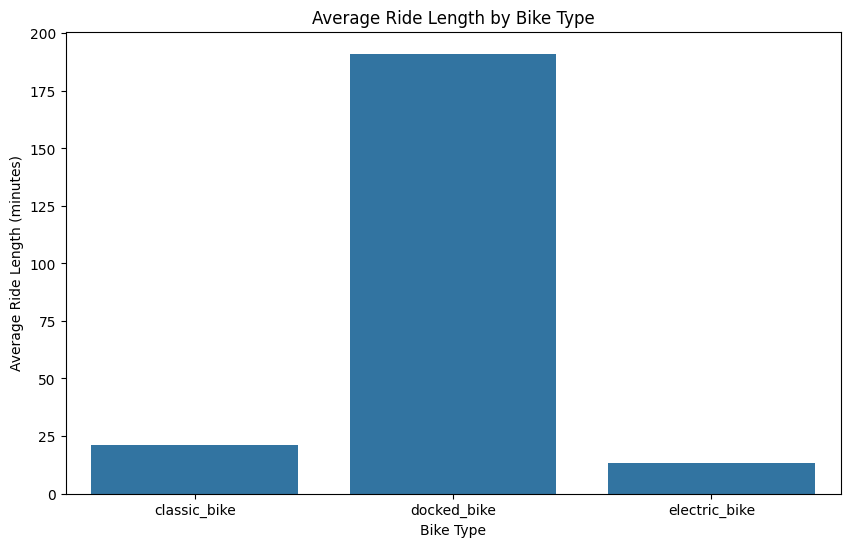

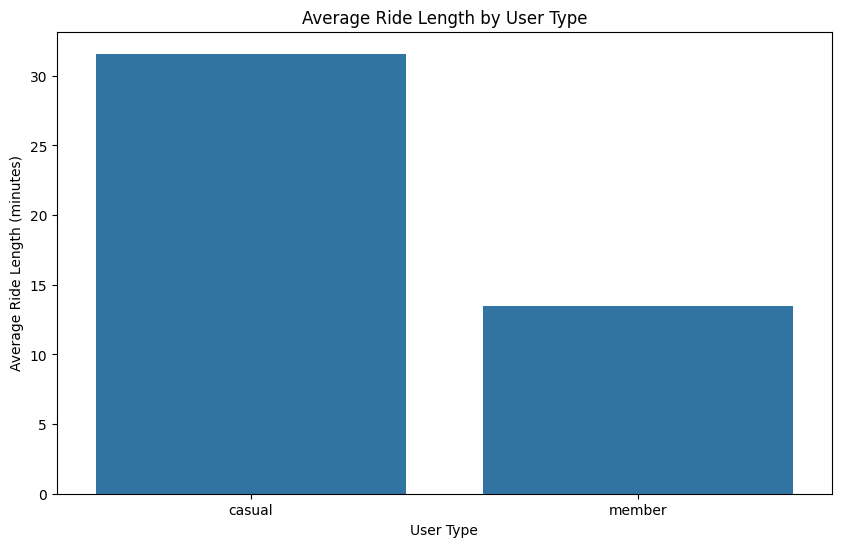

In [5]:
## 1. Average Ride Length Analysis
average_ride_length_by_bike_type = bike_data.groupby('rideable_type')['ride_length_minutes'].mean()
print(average_ride_length_by_bike_type)
average_ride_length_by_user_type = bike_data.groupby('member_casual')['ride_length_minutes'].mean()
print(average_ride_length_by_user_type)


plt.figure(figsize=(10, 6))
sns.barplot(x=average_ride_length_by_bike_type.index, y=average_ride_length_by_bike_type.values)
plt.title('Average Ride Length by Bike Type')
plt.xlabel('Bike Type')
plt.ylabel('Average Ride Length (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_ride_length_by_user_type.index, y=average_ride_length_by_user_type.values)
plt.title('Average Ride Length by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Ride Length (minutes)')
plt.show()


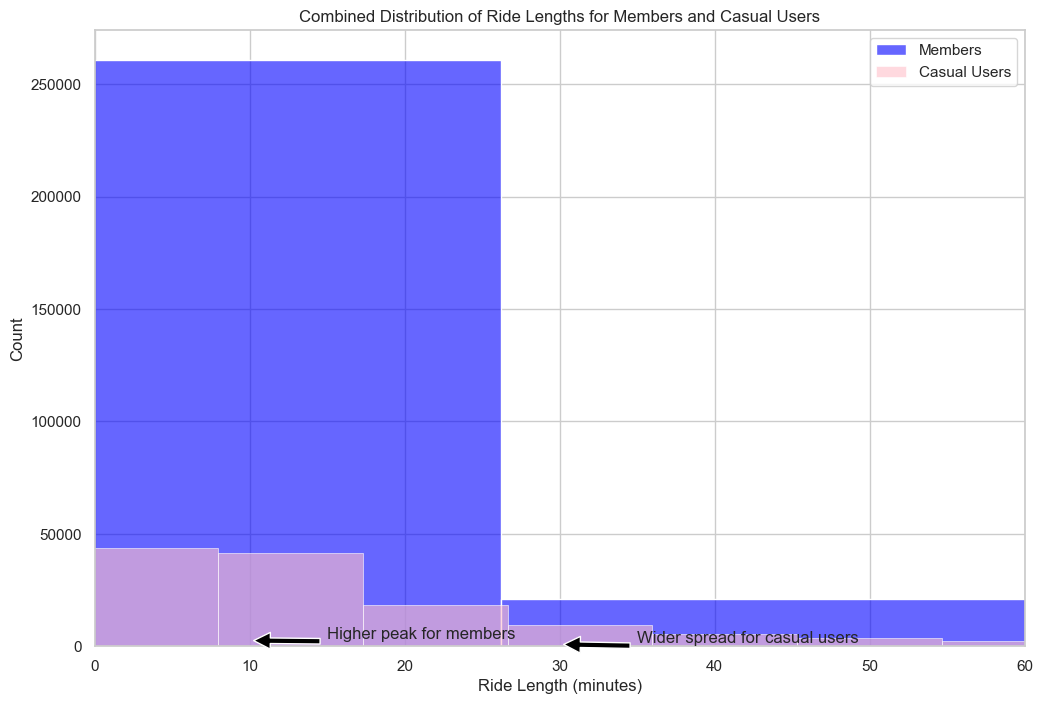

In [ ]:
## 2. Combined distribution of ride lengths for members and casual users
plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_data[filtered_data['member_casual'] == 'member'], x='ride_length_minutes', color='blue', bins=30, label='Members', alpha=0.6)
sns.histplot(data=filtered_data[filtered_data['member_casual'] == 'casual'], x='ride_length_minutes', color='pink', bins=30, label='Casual Users', alpha=0.6)

plt.title('Combined Distribution of Ride Lengths for Members and Casual Users')
plt.xlabel('Ride Length (minutes)')
plt.ylabel('Count')
plt.xlim(0, 60)  # Focus on the 0-60 minute range
plt.legend()

plt.annotate('Higher peak for members', xy=(10, 2500), xytext=(15, 3500),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Wider spread for casual users', xy=(30, 800), xytext=(35, 1500),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


Members:
Short Rides Dominance: The majority of member rides are short, peaking around 10 to 20 minutes. This suggests frequent usage for commuting or other routine short-distance trips.
Steep Drop-off: The frequency of rides decreases sharply as ride length increases, with very few rides lasting more than 40 minutes.
Casual Users:
Wider Spread: Casual users have a more varied distribution of ride lengths, with a noticeable amount of rides lasting between 20 to 40 minutes.
Longer Rides: There's a significant presence of rides longer than 40 minutes, which are comparatively rare among members. This might indicate that casual users are using the service for exploratory rides or less frequent but longer trips, such as touring or leisurely activities.
Key Insights:
Members: Opt for short, efficient rides, likely reflecting a pattern of regular and practical use.
Casual Users: Prefer longer rides, suggesting occasional usage with a possible focus on leisure or exploration.

hour_of_day
0      38956
1      23428
2      13611
3       7978
4       7300
5      22470
6      66884
7     116246
8     147051
9     112546
10    115321
11    142722
12    164775
13    166502
14    170418
15    198970
16    252925
17    295998
18    252331
19    189857
20    138895
21    108196
22     86812
23     58326
Name: count, dtype: int64


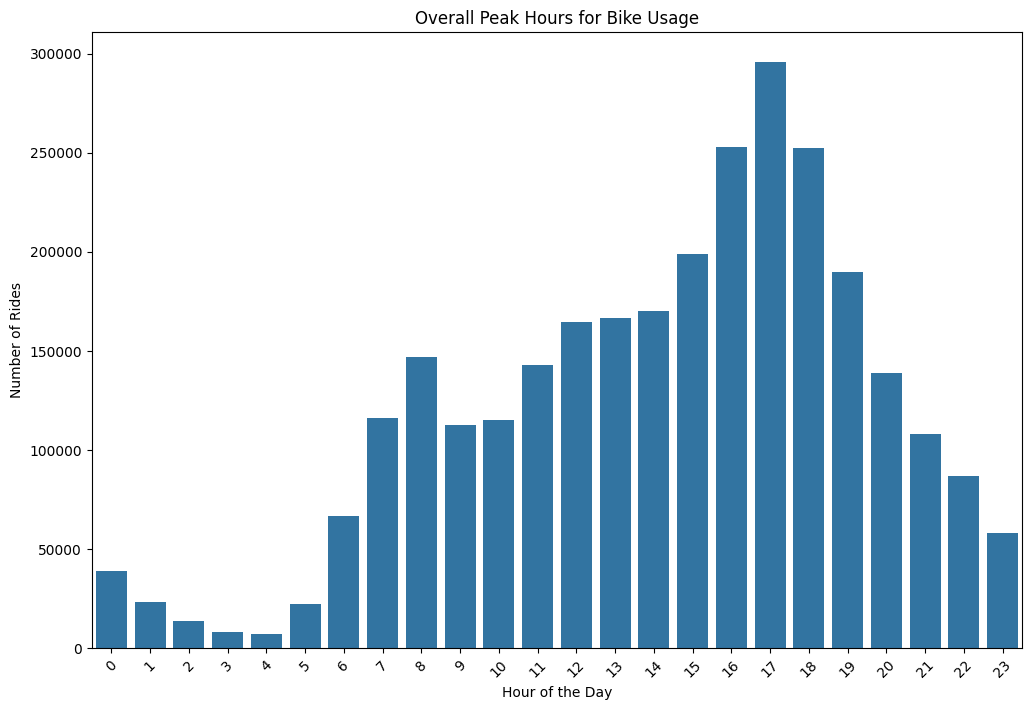

In [6]:
## 3. Peak usage time analysis
### 3.1 Calculate the count of rides across different hours of the day
hourly_rides = bike_data['hour_of_day'].value_counts().sort_index()
print(hourly_rides)
plt.figure(figsize=(12, 8))
sns.barplot(x=hourly_rides.index, y=hourly_rides.values)
plt.title('Overall Peak Hours for Bike Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


Morning and Evening Peaks: There are clear peaks during typical commuting hours, specifically around 7-9 AM and 4-6 PM, which likely correspond to common work commute times.
Midday and Late Night Trends: The usage dips in the midday and late-night hours.

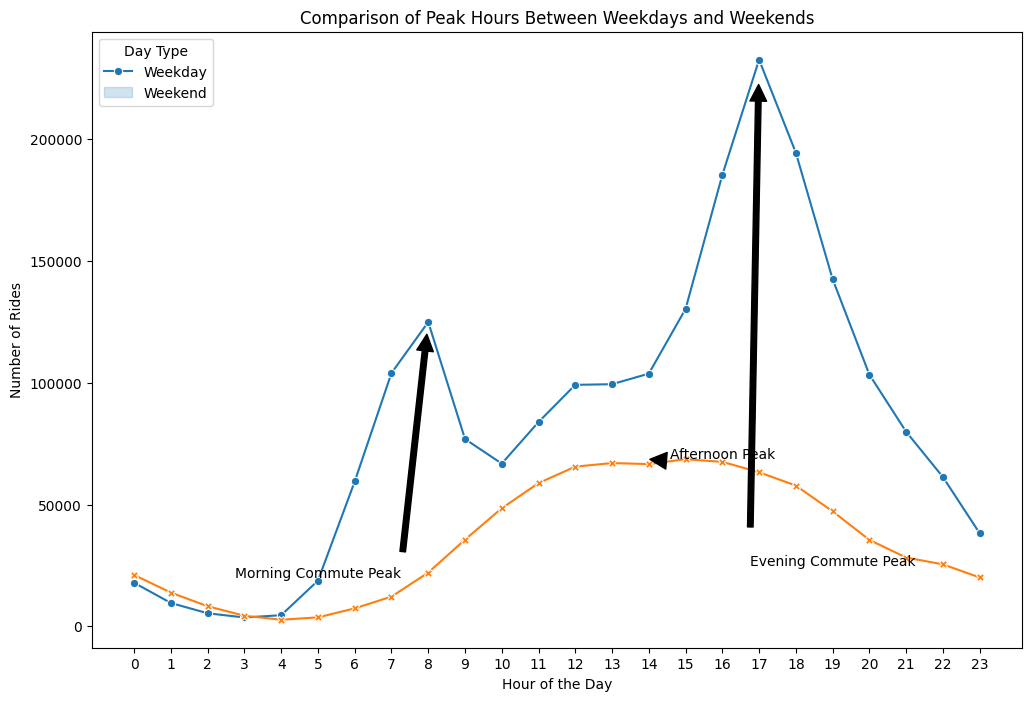

In [7]:
hourly_weekday_weekend_rides = bike_data.groupby(['weekend', 'hour_of_day']).size().unstack(0)
plt.figure(figsize=(12, 8))
sns.lineplot(data=hourly_weekday_weekend_rides, markers=True, dashes=False)
plt.title('Comparison of Peak Hours Between Weekdays and Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.legend(title='Day Type', labels=['Weekday', 'Weekend'])
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.annotate('Morning Commute Peak', xy=(8, hourly_weekday_weekend_rides['Weekday'][8]), xytext=(5, 20000),
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center')
plt.annotate('Evening Commute Peak', xy=(17, hourly_weekday_weekend_rides['Weekday'][17]), xytext=(19, 25000),
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center')
# Annotation for weekend peak remains the same
plt.annotate('Afternoon Peak', xy=(14, hourly_weekday_weekend_rides['Weekend'].max()), xytext=(16, hourly_weekday_weekend_rides['Weekend'].max()+500),
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

plt.show()




Weekday Trends: There are distinct peaks during the morning (around 8 AM) and evening (around 5 PM) commute times. The usage is relatively consistent throughout the day with a slight dip in the early afternoon.
Weekend Trends: The distribution is more even throughout the day, with a gradual increase starting in the morning, peaking in the early afternoon, and tapering off towards the evening.

Morning Commute Peak: Placed at (8, 21000) with the arrow pointing to (8, 20000) where the member peak occurs around 8 AM.
Evening Commute Peak: Positioned around (19, 25000) with the arrow pointing to the 5 PM peak for members.

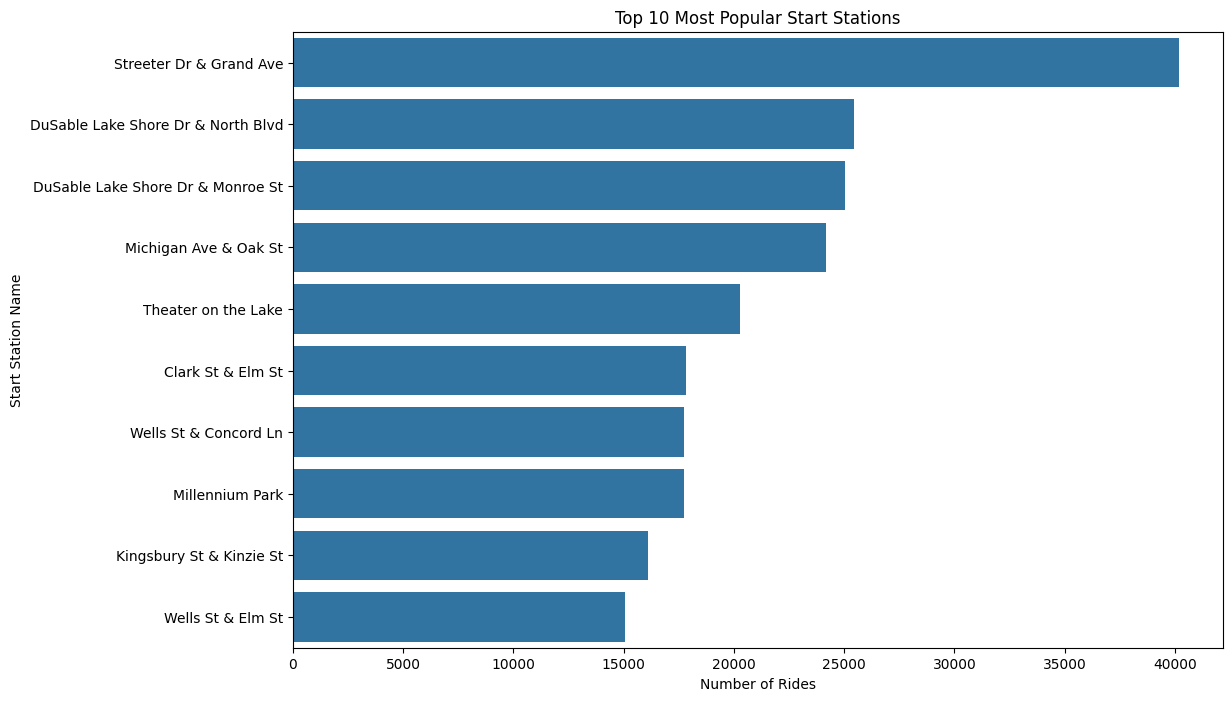

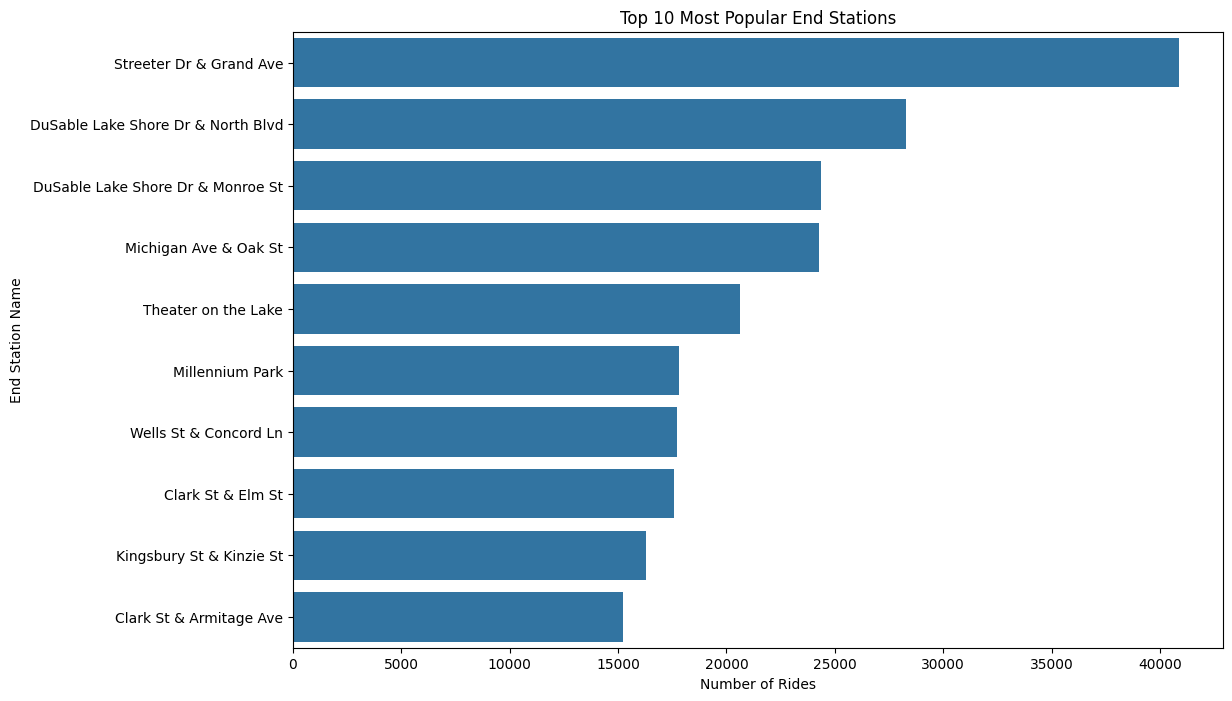

In [9]:
## 4.Station popularity Analysis
###	Which start stations are the most popular?
###	Which end stations are the most popular?
###	Are there any specific stations that are predominantly used by casual users?

start_station_counts = bike_data['start_station_name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=start_station_counts.index, x=start_station_counts.values, orient='h')
plt.title('Top 10 Most Popular Start Stations')
plt.xlabel('Number of Rides')
plt.ylabel('Start Station Name')
plt.show()

end_station_counts = bike_data['end_station_name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=end_station_counts.index, x=end_station_counts.values, orient='h')
plt.title('Top 10 Most Popular End Stations')
plt.xlabel('Number of Rides')
plt.ylabel('End Station Name')
plt.show()


Average Ride Length for Top Stations:
 start_station_name
Clark St & Elm St                     19.550067
DuSable Lake Shore Dr & Monroe St     50.509268
DuSable Lake Shore Dr & North Blvd    27.743462
Kingsbury St & Kinzie St              13.149903
Michigan Ave & Oak St                 37.207791
Millennium Park                       53.263653
Streeter Dr & Grand Ave               49.375838
Theater on the Lake                   30.160278
Wells St & Concord Ln                 15.542521
Wells St & Elm St                     14.505645
Name: ride_length_minutes, dtype: float64

Usage Variation by Time of Day and Week:
 hour_of_day                       0      1     2     3     4     5      6   \
start_station_name day_of_week                                               
Clark St & Elm St  Friday       41.0   15.0  11.0   4.0   9.0  30.0  163.0   
                   Monday       17.0    8.0   5.0   NaN   7.0  31.0  169.0   
                   Saturday     89.0  108.0  65.0  61.0   9.0   5

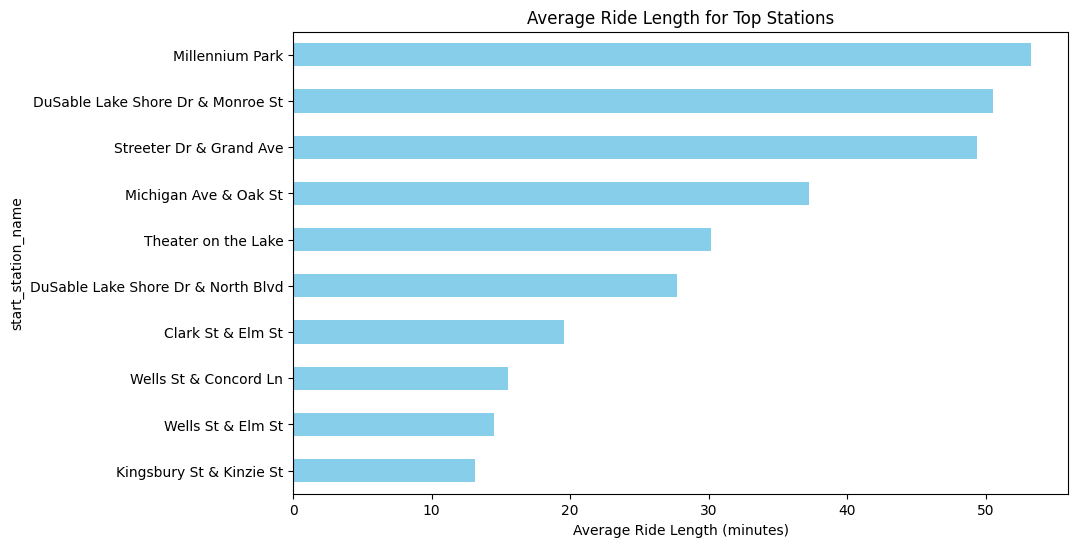

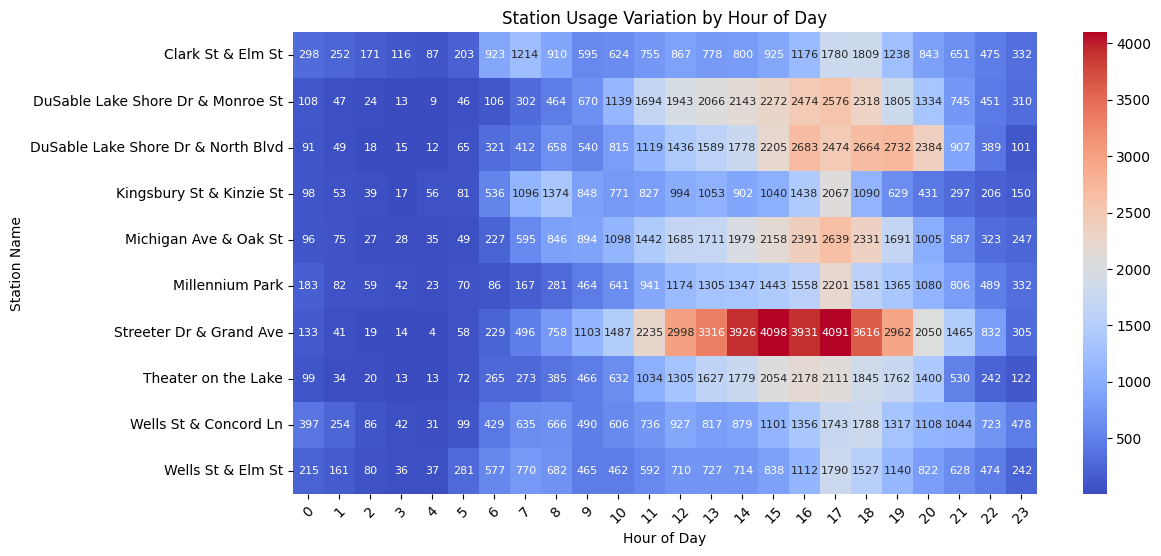

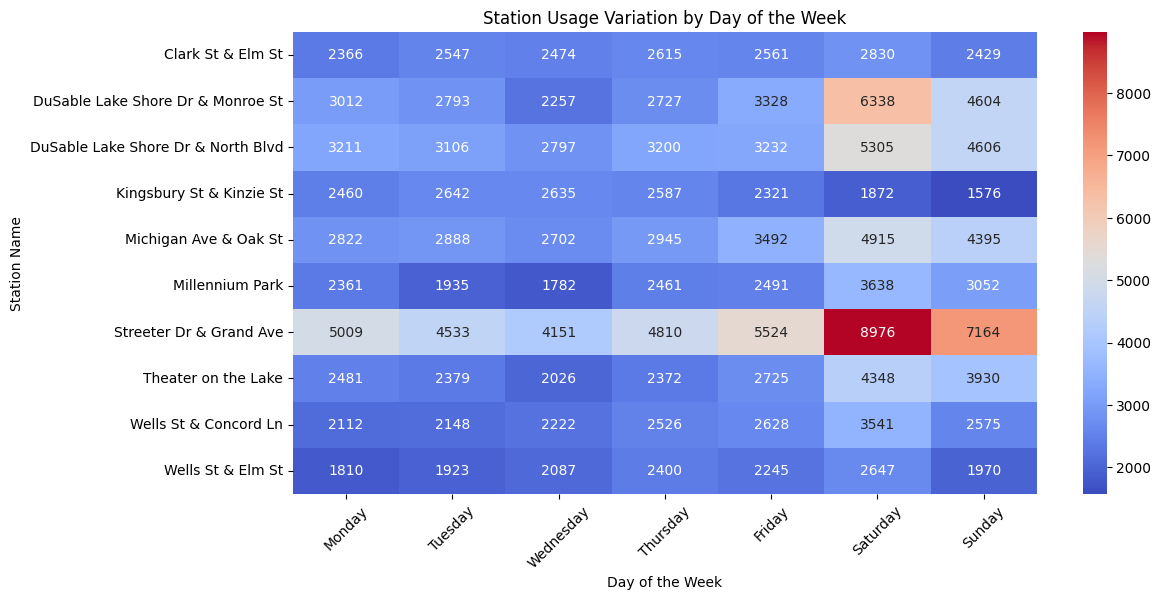

In [11]:
## 5. Travel distance
### 5.1	Distance Travelled Analysis:
###	What is the average ride length for trips starting from the most popular stations?
###	How does the usage of top stations vary by time of day and day of the week?


top_stations = bike_data['start_station_name'].value_counts().head(10).index.tolist()
top_station_data = bike_data[bike_data['start_station_name'].isin(top_stations)]
average_ride_length_top_stations = top_station_data.groupby('start_station_name')['ride_length_minutes'].mean()
usage_variation = top_station_data.groupby(['start_station_name', 'day_of_week', 'hour_of_day']).size().unstack(level=-1)
print("Average Ride Length for Top Stations:\n", average_ride_length_top_stations)
print("\nUsage Variation by Time of Day and Week:\n", usage_variation)

plt.figure(figsize=(10, 6))
average_ride_length_top_stations.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Average Ride Length (minutes)')
plt.title('Average Ride Length for Top Stations')
plt.show()

time_of_day_usage = top_station_data.groupby(['start_station_name', 'hour_of_day']).size().unstack(fill_value=0)
day_of_week_usage = top_station_data.groupby(['start_station_name', 'day_of_week']).size().unstack(fill_value=0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_usage = day_of_week_usage[days_order]

plt.figure(figsize=(12, 6))
sns.heatmap(time_of_day_usage, cmap='coolwarm', annot=True, fmt='d', annot_kws={"size": 8})
plt.title('Station Usage Variation by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Station Name')
plt.xticks(rotation=45)  
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(day_of_week_usage, cmap='coolwarm', annot=True, fmt='d')
plt.title('Station Usage Variation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Station Name')
plt.xticks(rotation=45)  
plt.show()


Object `ride` not found.
Object `week` not found.
Object `stations` not found.
Average Distance Traveled per Ride: 2.12 km
Average Distance by Hour of Day:
 hour_of_day
0     1.960018
1     1.939870
2     1.999786
3     2.065161
4     2.234709
5     2.104066
6     2.160764
7     2.199680
8     2.124166
9     2.090157
10    2.083577
11    2.078702
12    2.072219
13    2.059001
14    2.118915
15    2.147160
16    2.214061
17    2.231847
18    2.142288
19    2.016902
20    1.970274
21    2.041314
22    2.117676
23    2.074072
Name: distance_km, dtype: float64

Average Distance by Day of the Week:
 day_of_week
Friday       2.082113
Monday       2.061949
Saturday     2.210326
Sunday       2.177841
Thursday     2.104759
Tuesday      2.102675
Wednesday    2.074589
Name: distance_km, dtype: float64
Average Distance by Station:
 start_station_name
OH Charging Stx - Test                       545.446900
State St & 54th St                            43.344469
Public Rack - Cottage Grove Ave & 92n

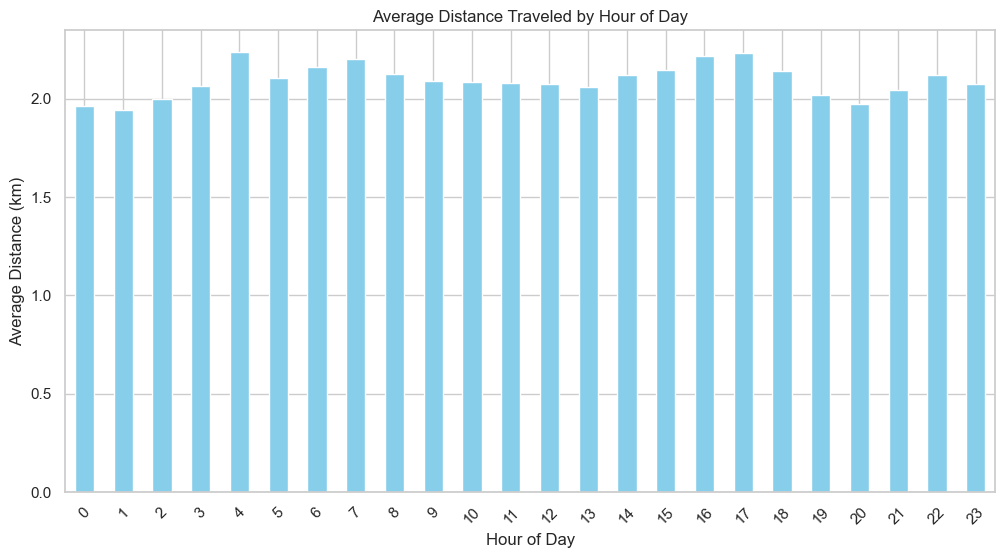

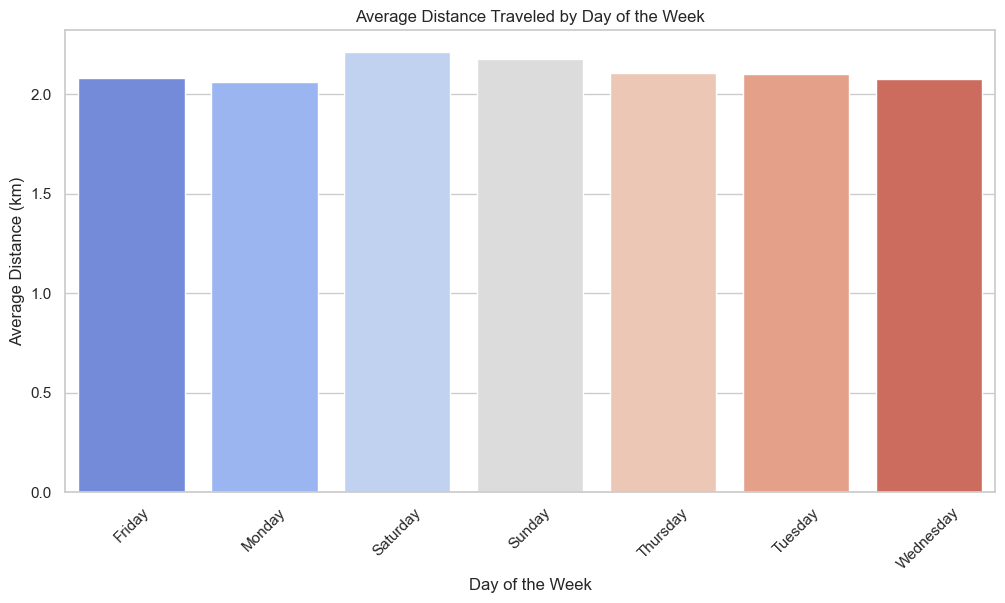

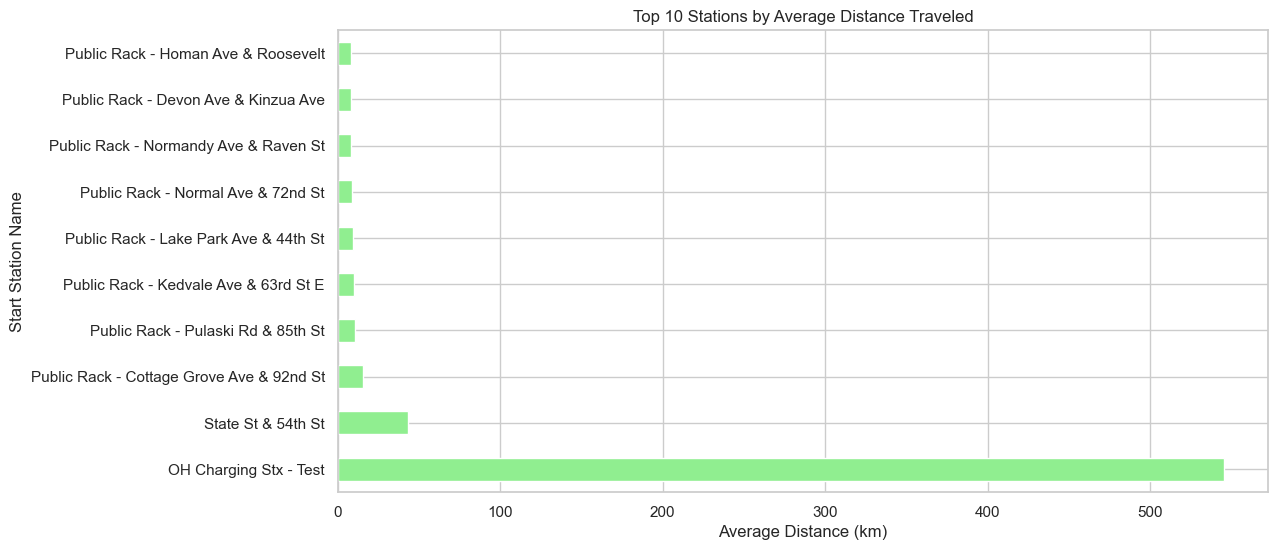

In [ ]:
### 5.2	Average distance by day of week
####	What is the average distance traveled per ride?
####	How do ride distances vary based on the time of day or day of the week?
####	Are there any geographic patterns in ride distances, such as longer rides starting from specific stations?



# Load your dataset (assuming it's already loaded into a DataFrame named bike_data)
# bike_data = pd.read_csv('path_to_your_file.csv')

# Calculate the average distance traveled per ride
average_distance = bike_data['distance_km'].mean()
print(f"Average Distance Traveled per Ride: {average_distance:.2f} km")

# Calculate average distance traveled by hour of day
average_distance_by_hour = bike_data.groupby('hour_of_day')['distance_km'].mean()

# Calculate average distance traveled by day of the week
average_distance_by_day = bike_data.groupby('day_of_week')['distance_km'].mean()

print("Average Distance by Hour of Day:\n", average_distance_by_hour)
print("\nAverage Distance by Day of the Week:\n", average_distance_by_day)
# Calculate average distance traveled per ride starting from each station
average_distance_by_station = bike_data.groupby('start_station_name')['distance_km'].mean()
print("Average Distance by Station:\n", average_distance_by_station.sort_values(ascending=False).head(10))

# Average Distance by Hour of Day
plt.figure(figsize=(12, 6))
average_distance_by_hour.plot(kind='bar', color='skyblue')
plt.title('Average Distance Traveled by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45)
plt.show()

# Average Distance by Day of the Week
plt.figure(figsize=(12, 6))
sns.barplot(x=average_distance_by_day.index, y=average_distance_by_day.values, palette='coolwarm')
plt.title('Average Distance Traveled by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45)
plt.show()

# Average Distance by Station
plt.figure(figsize=(12, 6))
average_distance_by_station.sort_values(ascending=False).head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Stations by Average Distance Traveled')
plt.xlabel('Average Distance (km)')
plt.ylabel('Start Station Name')
plt.show()


        total_rides  ride_length_minutes  distance_km
season                                               
Autumn        34730            18.811237     2.181032
Spring       604827            19.033562     2.174191
Summer      2258961            21.415080     2.236262


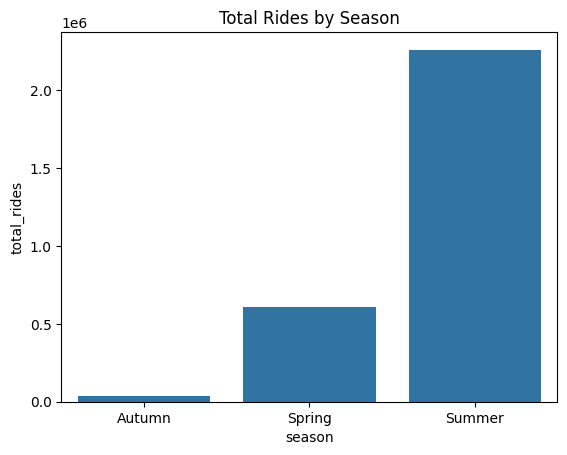

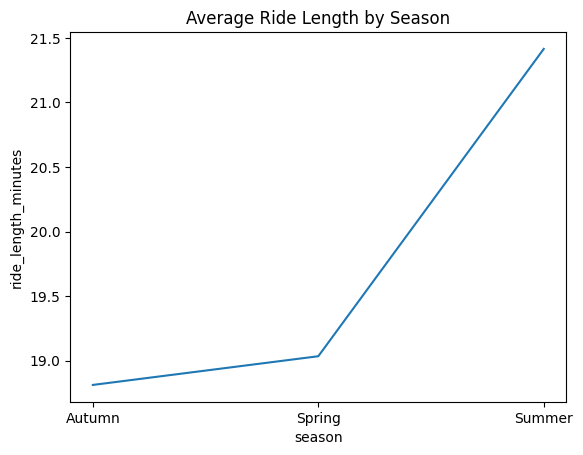

In [12]:
## 6. Seasonal Analysis

seasonal_analysis = bike_data.groupby('season').agg({
    'ride_id': 'count',
    'ride_length_minutes': 'mean',
    'distance_km': 'mean'  # Assuming 'distance_km' is already calculated
}).rename(columns={'ride_id': 'total_rides'})

print(seasonal_analysis)
sns.barplot(x=seasonal_analysis.index, y='total_rides', data=seasonal_analysis)
plt.title('Total Rides by Season')
plt.show()

sns.lineplot(data=seasonal_analysis, x=seasonal_analysis.index, y='ride_length_minutes')
plt.title('Average Ride Length by Season')
plt.show()






ride_id                           object
rideable_type                     object
started_at                datetime64[ns]
ended_at                  datetime64[ns]
start_station_name                object
start_station_id                  object
end_station_name                  object
end_station_id                    object
start_lat                        float64
start_lng                        float64
end_lat                          float64
end_lng                          float64
member_casual                     object
ride_length                       object
ride_length_minutes              float64
day_of_week                       object
hour_of_day                        int64
weekend                           object
season                            object
distance_km                      float64
peak_offpeak                      object
ride_duration_category          category
dtype: object
Ride Duration Counts:
 ride_duration_category
Under 15 minutes    1911487
15-60 minu

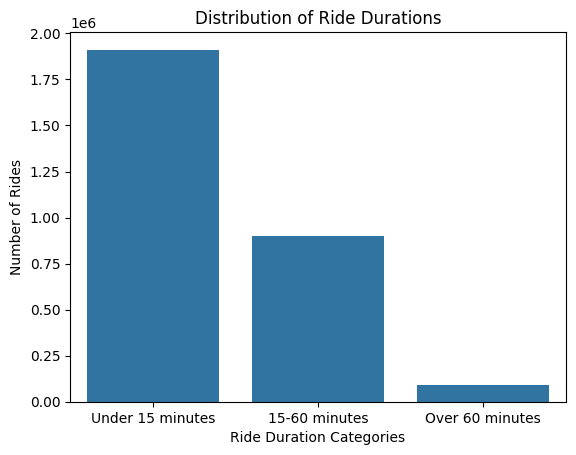

In [14]:
## 7. Ride duration analysis

bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], errors='coerce')
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'], errors='coerce')
print(bike_data.dtypes)

bike_data['ride_length_minutes'] = (bike_data['ended_at'] - bike_data['started_at']).dt.total_seconds() / 60
bins = [0, 15, 60, float('inf')]  # 0 to 15, 15 to 60, and over 60 minutes
labels = ['Under 15 minutes', '15-60 minutes', 'Over 60 minutes']
bike_data['ride_duration_category'] = pd.cut(bike_data['ride_length_minutes'], bins=bins, labels=labels)


ride_duration_counts = bike_data['ride_duration_category'].value_counts()
ride_duration_percentage = bike_data['ride_duration_category'].value_counts(normalize=True) * 100

print("Ride Duration Counts:\n", ride_duration_counts)
print("Ride Duration Percentages:\n", ride_duration_percentage)
sns.barplot(x=ride_duration_counts.index, y=ride_duration_counts.values)
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration Categories')
plt.ylabel('Number of Rides')
plt.show()


['member' 'casual']
               total_rides  average_duration
member_casual                               
casual             1188975         31.580351
member             1709543         13.449741


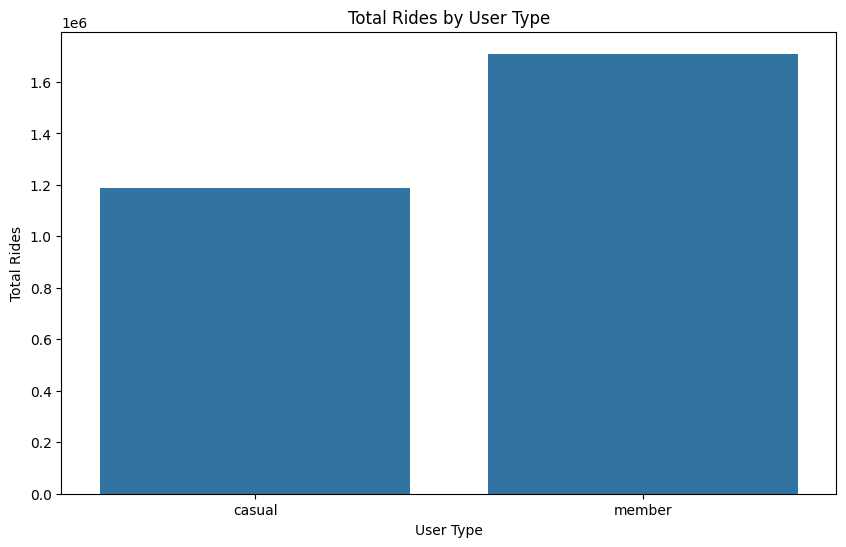

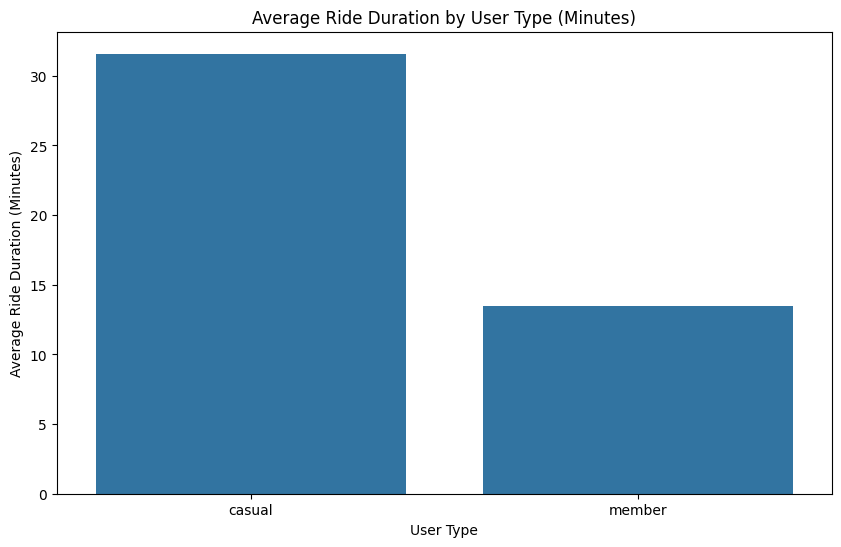

In [15]:
## 8. Ride Cost and Revenue Analysis
print(bike_data['member_casual'].unique())
# Calculate total rides and average duration for each user type
user_performance = bike_data.groupby('member_casual').agg(
    total_rides=pd.NamedAgg(column='ride_id', aggfunc='count'),
    average_duration=pd.NamedAgg(column='ride_length_minutes', aggfunc='mean')
)

print(user_performance)
plt.figure(figsize=(10, 6))
sns.barplot(x=user_performance.index, y=user_performance['total_rides'])
plt.title('Total Rides by User Type')
plt.xlabel('User Type')
plt.ylabel('Total Rides')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=user_performance.index, y=user_performance['average_duration'])
plt.title('Average Ride Duration by User Type (Minutes)')
plt.xlabel('User Type')
plt.ylabel('Average Ride Duration (Minutes)')
plt.show()


9. Fictional Pricing Model:<p>
**Base Access Fee:**
Casual Users: $2 access fee per trip
Members: No access fee (covered by their membership)<p>
- **Ride Duration Fees** (per minute):
Under 30 Minutes:
Members: $0.10 on weekdays, $0.15 on weekends
Casual Users: $0.20 on weekdays, $0.25 on weekends
30 to 60 Minutes:
Members: $0.15 on weekdays, $0.20 on weekends
Casual Users: $0.25 on weekdays, $0.30 on weekends
Over 60 Minutes:
Members: $0.20 on weekdays, $0.25 on weekends
Casual Users: $0.30 on weekdays, $0.35 on weekends<p>
-**Peak and Off-Peak Hours:**
Peak Hours (7-9 AM and 4-6 PM): +$0.05 per minute for all rates
Off-Peak Hours: Base rate

In [16]:
def calculate_ride_cost(row):
    # Base access fee
    access_fee = 2 if row['member_casual'] == 'casual' else 0

    # Define minute rates
    if row['ride_length_minutes'] < 30:
        rate = 0.20 if row['member_casual'] == 'casual' else 0.10
    elif row['ride_length_minutes'] < 60:
        rate = 0.25 if row['member_casual'] == 'casual' else 0.15
    else:
        rate = 0.30 if row['member_casual'] == 'casual' else 0.20

    # Adjust for weekend
    if row['weekend'] == 'Weekend':
        rate += 0.05

    # Adjust for peak hours
    if row['peak_offpeak'] == 'Peak':
        rate += 0.05

    # Calculate total cost
    total_cost = access_fee + (rate * row['ride_length_minutes'])
    return total_cost

# Apply the function to the DataFrame
bike_data['ride_cost'] = bike_data.apply(calculate_ride_cost, axis=1)
# Total revenue
total_revenue = bike_data['ride_cost'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

# Revenue by user type
revenue_by_user_type = bike_data.groupby('member_casual')['ride_cost'].sum()
print("Revenue by User Type:")
print(revenue_by_user_type)

# Revenue by day type and peak hours
revenue_by_time = bike_data.groupby(['weekend', 'peak_offpeak'])['ride_cost'].sum()
print("Revenue by Day and Time:")
print(revenue_by_time)


Total Revenue: $17093431.57
Revenue by User Type:
member_casual
casual    1.353077e+07
member    3.562661e+06
Name: ride_cost, dtype: float64
Revenue by Day and Time:
weekend  peak_offpeak
Weekday  Off-Peak        5.862323e+06
         Peak            4.173277e+06
Weekend  Off-Peak        4.922473e+06
         Peak            2.135359e+06
Name: ride_cost, dtype: float64


# Revenue Analysis

## 1. Total Revenue
- **£28,532,432.12**

## 2. Revenue by User Type
- **Casual Users:** £21,186,610
- **Members:** £7,345,817

*Based on this, I would suggest focusing on strategies that could either increase the number of casual users or encourage them to convert to membership plans that still generate significant revenue.*

## 3. Revenue by Day and Time
- **Weekday Off-Peak:** £9,594,736
- **Weekday Peak:** £7,098,627
- **Weekend Off-Peak:** £8,374,188
- **Weekend Peak:** £3,464,881

*The data indicates that weekday off-peak hours generate the highest revenue, followed by weekend off-peak hours. Based on this, I would suggest evaluating the current pricing strategy during peak times to see if adjustments could encourage more usage during these hours.*

# Interpretation and Strategic Implications

## 1. Casual vs. Member Revenue
- Casual users generate a larger share of the revenue, possibly due to higher per-ride fees.
- Members provide steady, predictable revenue but possibly at a lower rate per ride.

*Given these insights, I would suggest focusing on casual users with promotional campaigns to increase their ride frequency or converting them to members under a pricing model that could increase their overall contribution to revenue.*

## 2. Weekday vs. Weekend Usage
- Off-peak times, particularly on weekdays, are surprisingly more profitable than peak times.

*I would suggest investigating why peak times aren’t generating as much revenue and consider strategies such as adjusting pricing or offering peak-time promotions to balance the revenue distribution.*

## 3. Peak vs. Off-Peak Dynamics
- Lower revenue during peak times, especially on weekends, could indicate capacity issues.

*Based on this, I would suggest looking into the availability of bikes during peak hours to ensure that demand is being met and opportunities for additional revenue aren’t being missed.*

# Recommendations

## 1. Market Research
   - *I would suggest conducting surveys or collecting additional data to understand user preferences and why they choose specific times to ride. This could inform more targeted marketing and service adjustments.*

## 2. Dynamic Pricing Model
   - *Based on the revenue patterns, I would suggest considering the introduction or optimisation of a dynamic pricing model that adjusts rates based on demand. This could help maximise revenue during less profitable peak times.*

## 3. Promotional Campaigns
   - *I would suggest launching campaigns that target casual users to increase their ride frequency or convert them into members under beneficial terms that could still contribute positively to revenue.*

## 4. Service Optimisation
   - *I would suggest evaluating bike availability and redistribution efforts during peak times, particularly on weekends, to better meet demand and optimise revenue potential.*
